In [1]:
from pathlib import Path
import numpy as np
import logging

import pyvista as pv
pv.set_jupyter_backend("pythreejs")

from project_heart.enums import *
from project_heart.lv import LV

In [2]:
filepath = Path("C:/Users/igorp/Downloads/0.3_80.00_50.00_LVIDEAL_HEX20.xplt")
# filepath = Path("C:/Users/igornobrega/Downloads/0.3_80.00_50.00_LVIDEAL_HEX20.xplt")

# Load File and Create Speckles

In [3]:
lv = LV.from_file(filepath, log_level=logging.DEBUG)
lv.identify_regions(LV_GEO_TYPES.IDEAL,
    apex_base_args={"ab_ql":0.03, "ab_qh":0.90},
    endo_epi_args={"threshold":85,})
lv.plot("mesh", 
        scalars=LV_MESH_DATA.SURFS,
        container="points",
        show_edges=True,
        categorical=True,
        split_sharp_edges=True,
        smooth_shading=False,
        pretty=False,
        vnodes=[
            (LV_VIRTUAL_NODES.BASE, "red"),
            (LV_VIRTUAL_NODES.APEX, "red")
            ],
        )

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(position=(50000.000000…

## Create Longitudinal Speckles

In [4]:
for i, a in enumerate(np.linspace(0, np.pi, 6, endpoint=False)):
    
    spk = lv.create_speckles(
        collection="long-6",
        group="endo",
        name=str(i),
        from_nodeset=LV_SURFS.ENDO,
        exclude_nodeset=LV_SURFS.BASE, # does not afect ideal case
        d=1.75,
        k=0.5,
        normal_to=[np.cos(a),np.sin(a),0.0],
        n_subsets=6,
        subsets_criteria="z2",
        t=0.0,
        kmin=0.125,
        kmax=0.95,
        log_level=logging.INFO,
    )

    spk = lv.create_speckles(
        collection="long-6",
        group="epi",
        name=str(i),
        from_nodeset=LV_SURFS.EPI,
        exclude_nodeset=LV_SURFS.BASE, # does not afect ideal case
        d=2.4,
        k=0.5,
        normal_to=[np.cos(a),np.sin(a),0.0],
        n_subsets=6,
        subsets_criteria="z2",
        t=0.0,
        kmin=0.125,
        kmax=0.95,
        log_level=logging.INFO,
    )

lv.set_region_from_speckles("long-6", spk_collection="long-6")
lv.plot(
    scalars="long-6", 
    categorical=True, 
    cmap="jet",
    vnodes=[
            (LV_VIRTUAL_NODES.BASE, "red"),
            (LV_VIRTUAL_NODES.APEX, "red")
            ],
    )



INFO:create_speckles:Speckle: name: 0, group: endo, collection: long-6
INFO:create_speckles:Speckle: name: 0, group: epi, collection: long-6
INFO:create_speckles:Speckle: name: 1, group: endo, collection: long-6
INFO:create_speckles:Speckle: name: 1, group: epi, collection: long-6
INFO:create_speckles:Speckle: name: 2, group: endo, collection: long-6
INFO:create_speckles:Speckle: name: 2, group: epi, collection: long-6
INFO:create_speckles:Speckle: name: 3, group: endo, collection: long-6
INFO:create_speckles:Speckle: name: 3, group: epi, collection: long-6
INFO:create_speckles:Speckle: name: 4, group: endo, collection: long-6
INFO:create_speckles:Speckle: name: 4, group: epi, collection: long-6
INFO:create_speckles:Speckle: name: 5, group: endo, collection: long-6
INFO:create_speckles:Speckle: name: 5, group: epi, collection: long-6


Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(position=(50000.000000…

## Create circumferential speckles

In [5]:
names = ["subapex", "apex", "superapex", "submid", "mid", "supermid", "subbase", "base", "superbase"]

for i, a in enumerate(np.linspace(0.1, 1.0, len(names), endpoint=False)):
    
    spk = lv.create_speckles(
        collection="circ-6",
        group="endo",
        name=names[i],
        from_nodeset=LV_SURFS.ENDO,
        d=1.75,
        k=a,
        normal_to=[0.0, 0.0, 1.0],
        n_subsets=6,
        subsets_criteria="angles",
        t=0.0,
        kmin=-1.0,
        kmax=-1.0,
        log_level=logging.INFO,
    )

    spk = lv.create_speckles(
        collection="circ-6",
        group="epi",
        name=names[i],
        from_nodeset=LV_SURFS.EPI,
        d=1.75,
        k=a,
        normal_to=[0.0, 0.0, 1.0],
        n_subsets=6,
        subsets_criteria="angles",
        t=0.0,
        kmin=-1.0,
        kmax=-1.0,
        log_level=logging.INFO,
    )

lv.set_region_from_speckles("circ-6", spk_collection="circ-6")
lv.plot(
    scalars="circ-6", 
    categorical=True, 
    cmap="jet",
    vnodes=[
            (LV_VIRTUAL_NODES.BASE, "red"),
            (LV_VIRTUAL_NODES.APEX, "red")
            ],
    )

INFO:create_speckles:Speckle: name: subapex, group: endo, collection: circ-6
INFO:create_speckles:Speckle: name: subapex, group: epi, collection: circ-6
INFO:create_speckles:Speckle: name: apex, group: endo, collection: circ-6
INFO:create_speckles:Speckle: name: apex, group: epi, collection: circ-6
INFO:create_speckles:Speckle: name: superapex, group: endo, collection: circ-6
INFO:create_speckles:Speckle: name: superapex, group: epi, collection: circ-6
INFO:create_speckles:Speckle: name: submid, group: endo, collection: circ-6
INFO:create_speckles:Speckle: name: submid, group: epi, collection: circ-6
INFO:create_speckles:Speckle: name: mid, group: endo, collection: circ-6
INFO:create_speckles:Speckle: name: mid, group: epi, collection: circ-6
INFO:create_speckles:Speckle: name: supermid, group: endo, collection: circ-6
INFO:create_speckles:Speckle: name: supermid, group: epi, collection: circ-6
INFO:create_speckles:Speckle: name: subbase, group: endo, collection: circ-6
INFO:create_spe

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(position=(50000.000000…

# Compute Metric

Using some subset for numerical validation

Using 'base' subset as reference, we expect a radius of 30 and ~24.5 at first and last timesteps, respectively. 

Expected values for timesteps [0, 0.1 and 1.1]:

- Endo (approx):    25,  17,  17.5
- Epi (approx):     35,  32,  32
- Mean:             30,  24.5,  24.75

In [6]:
circ_spks = lv.get_speckles(spk_name="base", spk_collection="circ-6")
lv.radius(circ_spks, recompute=True, log_level=logging.DEBUG)

INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.RADIUS'
DEBUG:LV.BaseMetricsComputations:Computing speckle radius for spk: '<Speckle: .subset: 0, .name: base, .group: endo, .collection: circ-6, .t: 0.0>'
DEBUG:LV.BaseMetricsComputations:Computing speckle center for spk: '<Speckle: .subset: 0, .name: base, .group: endo, .collection: circ-6, .t: 0.0>'
DEBUG:LV.BaseMetricsComputations:-k: '0.8'
-apex:'[[-4.25903949e-02 -3.19000715e-03 -7.37867626e+01]
 [ 3.29903923e-02  1.21529605e-01 -7.04370358e+01]
 [-4.09859488e-01  2.10972460e-01 -6.58182382e+01]
 [-6.75200681e-01  3.60056853e-01 -6.33473224e+01]
 [-5.56049890e-01  5.34302826e-01 -6.00581336e+01]
 [-5.56288523e-01  5.34007486e-01 -6.00518318e+01]
 [-5.56639724e-01  5.34546600e-01 -6.00527301e+01]
 [-5.56630026e-01  5.35257544e-01 -6.00620808e+01]
 [-5.57072245e-01  5.35929206e-01 -6.00621578e+01]
 [-5.57128288e-01  5.36741837e-01 -6.00709042e+01]
 [-5.57639538e-01  5.37534676e-01 -6.00707525e+01]
 [-5.57746739e-01  5.3844

array([29.98586687, 27.8395439 , 26.37616291, 25.11172222, 24.22110654,
       24.23572737, 24.24884037, 24.26022279, 24.27345629, 24.28495881,
       24.29814788, 24.30964672, 24.32270488, 24.33413465, 24.34701834,
       24.35834542, 24.37103439, 24.38224241, 24.39472902, 24.4058112 ,
       24.41809466, 24.42904949, 24.44113309, 24.45196218, 24.46378335,
       24.47448978, 24.48619007, 24.49677749, 24.50829561, 24.51876787,
       24.53010997, 24.54040133, 24.55157388, 24.56182737, 24.57283607,
       24.58298537, 24.59383588, 24.60388415, 24.61458163, 24.62453147,
       24.63508032, 24.64493371, 24.65533793, 24.66509665, 24.67535938])

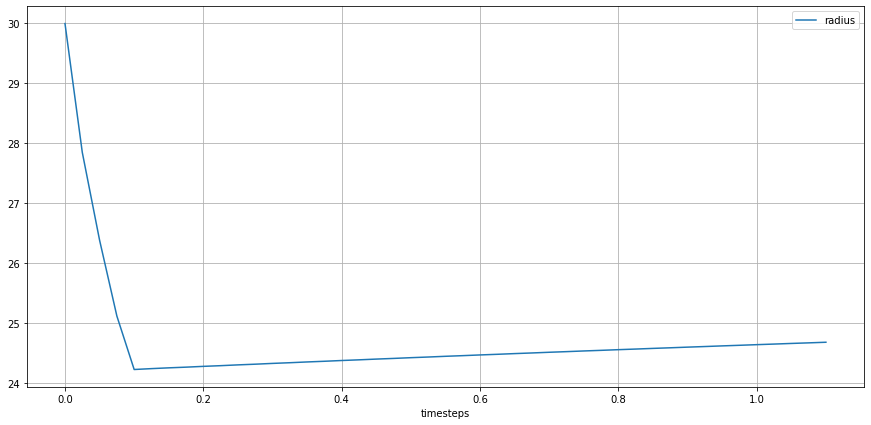

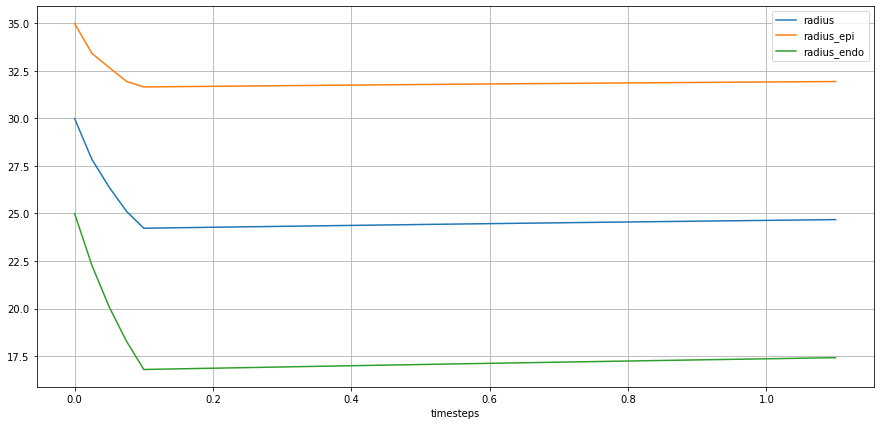

In [7]:
lv.plot_metric(lv.STATES.RADIUS, 
    from_ts=0.0, plot_infos=["group"])

Using all avaiable speckles

INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.RADIUS'


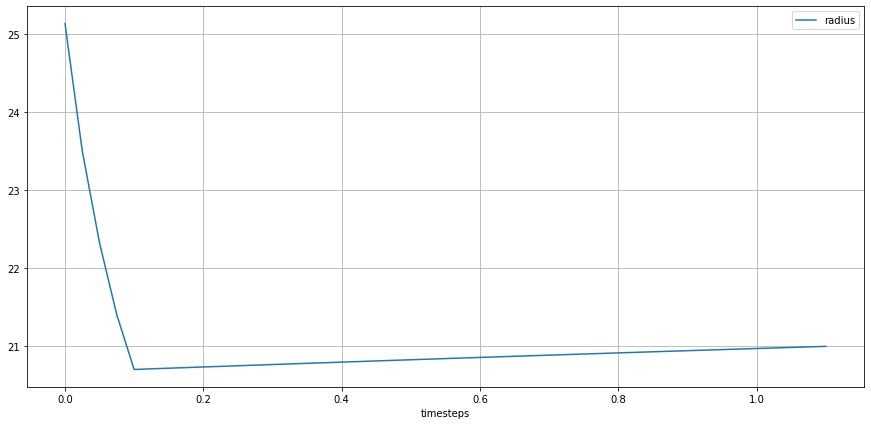

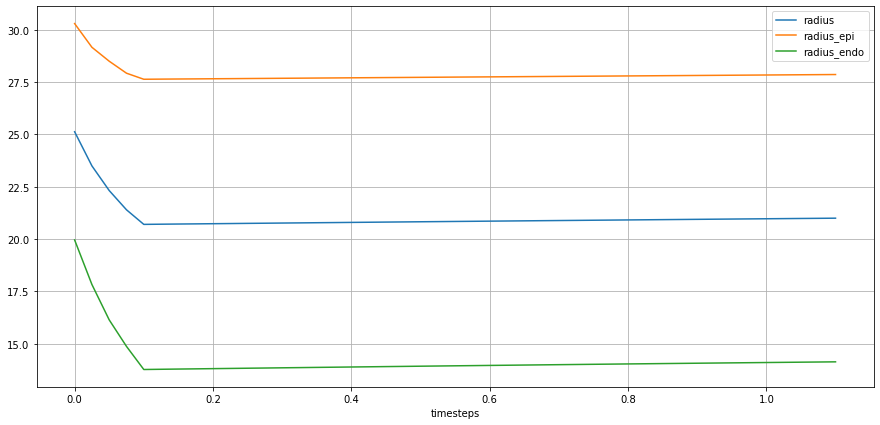

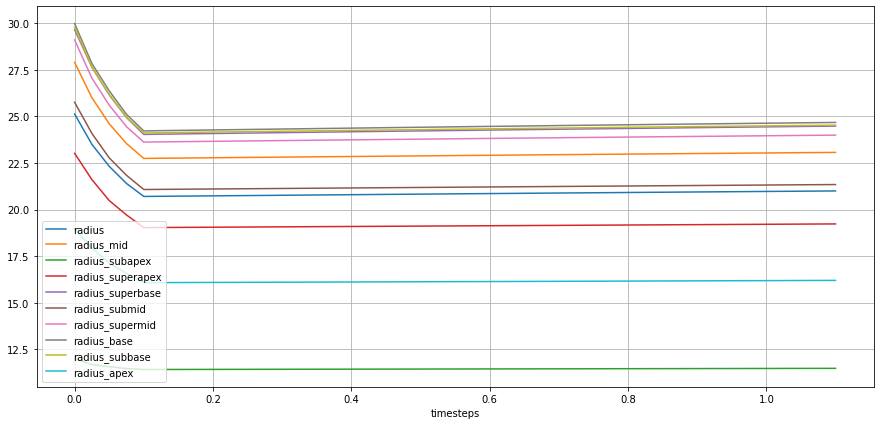

In [10]:
circ_spks = lv.get_speckles(spk_collection="circ-6")
lv.radius(circ_spks, recompute=True, log_level=logging.INFO, reduce_by={"group", "name"})
lv.plot_metric(lv.STATES.RADIUS, 
    from_ts=0.0, plot_infos=["group", "name"])